# Reto: Parte 1 Limpieza, análisis, visualización y kmeans
## Ciencia y analítica de datos
### Profesor: María de la Paz Rico Fernández
### Juan Sebastián Ortega Briones A01794327
**16 de Noviembre del 2022**

In [357]:
#!pip3 install geopandas
#!pip3 install qeds

In [358]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
from tqdm import tqdm
from shapely.geometry import Point
import qeds
import seaborn as sns
qeds.themes.mpl_style()
%matplotlib inline

In [359]:
qeds.themes.mpl_style()
pd.set_option("display.max_columns", 57)
pd.set_option("display.max_rows", 100)

**Uso de Base de datos de Aguas Subterraneas**

In [360]:
df=pd.read_csv("./Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding = 'ISO-8859-1')  #Importa datos de Aguas subterraneas

In [361]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [362]:
df.shape

(1068, 57)

# Limpieza de datos

In [365]:
#Array de solo las columnas numericas
datos_numericos=['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

In [437]:
#Remplaza datos numericos que incluyen el simbolo < por 0
df.replace(to_replace=r'[<]\w+', value=0, regex=True, inplace=True)

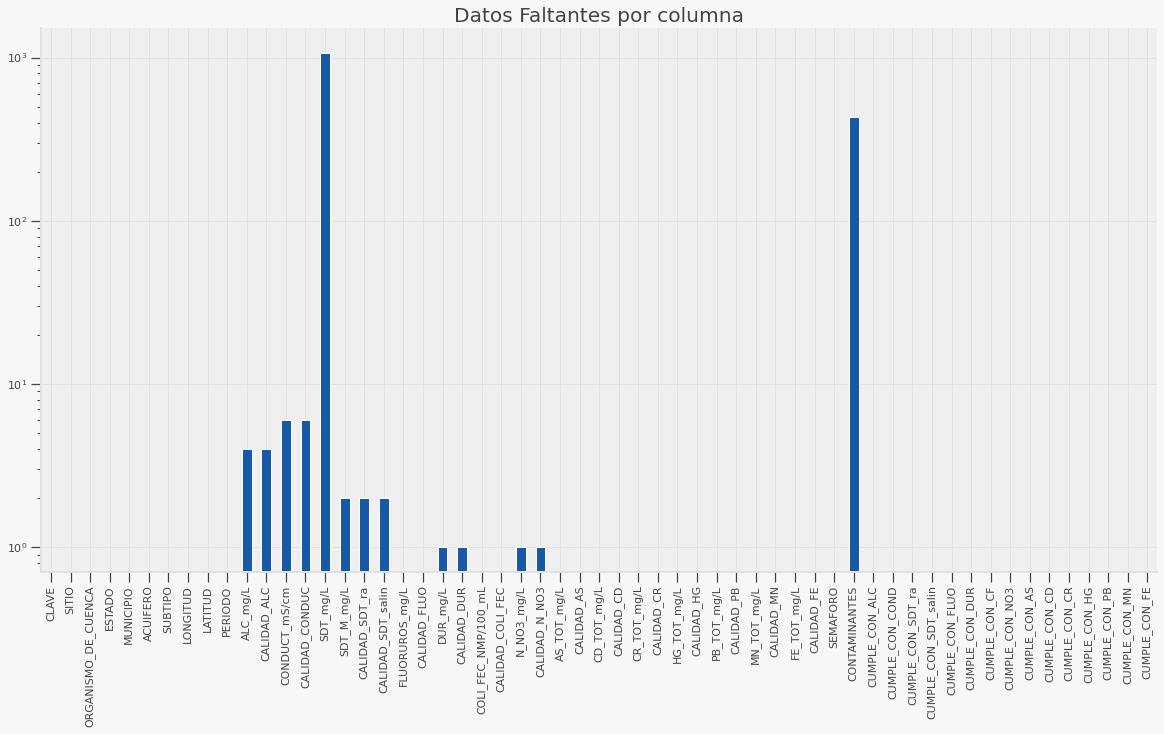

In [409]:
#Cuantas filas contienen NaN por columna
figure(figsize=(20, 10))

#sns.barplot()
nas=df.isna().sum()
nas.plot(kind='bar', logy=True).set_title('Datos Faltantes por columna')
plt.show()

**Exporación de datos**

In [415]:
#Convierte columnas que contienen datos númericos de tipo objeto a tipo flotante
df[datos_numericos]=df[datos_numericos].astype('float')

In [414]:
df[datos_numericos].describe()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1064.000000,1062.000000,1066.000000,1068.000000,1067.000000,1068.000000,1067.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,235.633759,1138.953013,896.078115,1.045263,347.450725,354.731273,4.318540,0.011987,0.000035,0.009277,0.000104,0.000422,0.071713,0.401001
std,116.874291,1245.563674,2751.538128,1.939375,360.127162,2052.588264,8.345763,0.037480,0.000997,0.154619,0.000540,0.003743,0.376658,5.538641
min,26.640000,50.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.000000,501.750000,337.500000,0.267175,121.194800,0.000000,0.650294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,215.527500,815.000000,550.400000,0.503500,245.335800,0.000000,2.080932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046960
75%,292.710000,1322.750000,916.100000,1.139850,453.930000,13.250000,5.201698,0.000000,0.000000,0.000000,0.000000,0.000000,0.009947,0.173380
max,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [ ]:
#df_sub[(df_sub['ESTADO']=='YUCATAN') & (df_sub['SEMAFORO']=='Rojo') ].head()

In [ ]:
df_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

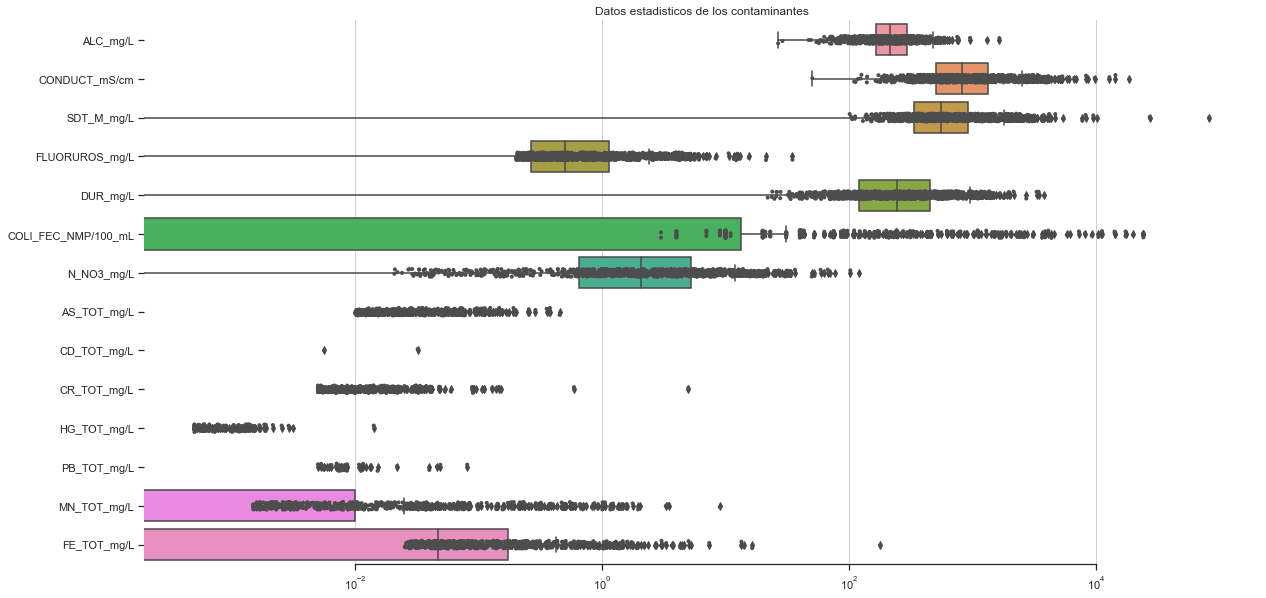

In [424]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(20, 10))
ax.set_xscale("log")

sns.boxplot(data=df[datos_numericos],orient='h').set(title='Datos estadisticos de los contaminantes')
sns.stripplot(data=df[datos_numericos],size=4, color=".3", linewidth=0, orient='h')
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.show()

# Correlación entre contaminantes de Aguas Subterraneas

In [425]:
corr=df[datos_numericos].corr()
corr

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.232003,0.079350,0.068982,0.242484,-0.016441,-0.000442,0.072592,0.030589,-0.014136,0.076929,0.023182,0.130074,0.043638
CONDUCT_mS/cm,0.232003,1.000000,0.286562,-0.023772,0.692690,0.017829,0.219482,-0.008690,0.027178,0.004159,0.048255,0.026432,0.096223,0.083540
SDT_M_mg/L,0.079350,0.286562,1.000000,-0.012557,0.346973,-0.001110,0.101710,-0.013096,0.010109,0.000194,0.037751,0.030445,0.019085,0.020271
FLUORUROS_mg/L,0.068982,-0.023772,-0.012557,1.000000,-0.152799,0.002728,-0.018393,0.457398,-0.019101,-0.004505,-0.035890,-0.043398,-0.049016,-0.009864
DUR_mg/L,0.242484,0.692690,0.346973,-0.152799,1.000000,0.031862,0.301449,-0.121827,0.023733,0.006983,0.066213,-0.011427,0.084150,0.060191
COLI_FEC_NMP/100_mL,-0.016441,0.017829,-0.001110,0.002728,0.031862,1.000000,-0.000963,0.033501,0.001762,-0.009335,-0.013002,0.017468,-0.005169,0.003213
N_NO3_mg/L,-0.000442,0.219482,0.101710,-0.018393,0.301449,-0.000963,1.000000,-0.001429,-0.010352,-0.015327,-0.001348,-0.019912,-0.037027,0.013107
AS_TOT_mg/L,0.072592,-0.008690,-0.013096,0.457398,-0.121827,0.033501,-0.001429,1.000000,-0.011335,-0.012069,-0.025514,-0.029946,0.018330,0.012053
CD_TOT_mg/L,0.030589,0.027178,0.010109,-0.019101,0.023733,0.001762,-0.010352,-0.011335,1.000000,-0.002126,-0.006840,-0.003995,-0.003267,-0.000971
CR_TOT_mg/L,-0.014136,0.004159,0.000194,-0.004505,0.006983,-0.009335,-0.015327,-0.012069,-0.002126,1.000000,0.011547,0.001978,-0.005121,0.000620


In [430]:
df[datos_numericos].corr().unstack().sort_values().drop_duplicates().head(10)

FLUORUROS_mg/L  DUR_mg/L         -0.152799
AS_TOT_mg/L     DUR_mg/L         -0.121827
FLUORUROS_mg/L  MN_TOT_mg/L      -0.049016
                PB_TOT_mg/L      -0.043398
MN_TOT_mg/L     N_NO3_mg/L       -0.037027
FLUORUROS_mg/L  HG_TOT_mg/L      -0.035890
AS_TOT_mg/L     PB_TOT_mg/L      -0.029946
HG_TOT_mg/L     AS_TOT_mg/L      -0.025514
CONDUCT_mS/cm   FLUORUROS_mg/L   -0.023772
PB_TOT_mg/L     N_NO3_mg/L       -0.019912
dtype: float64

<AxesSubplot:>

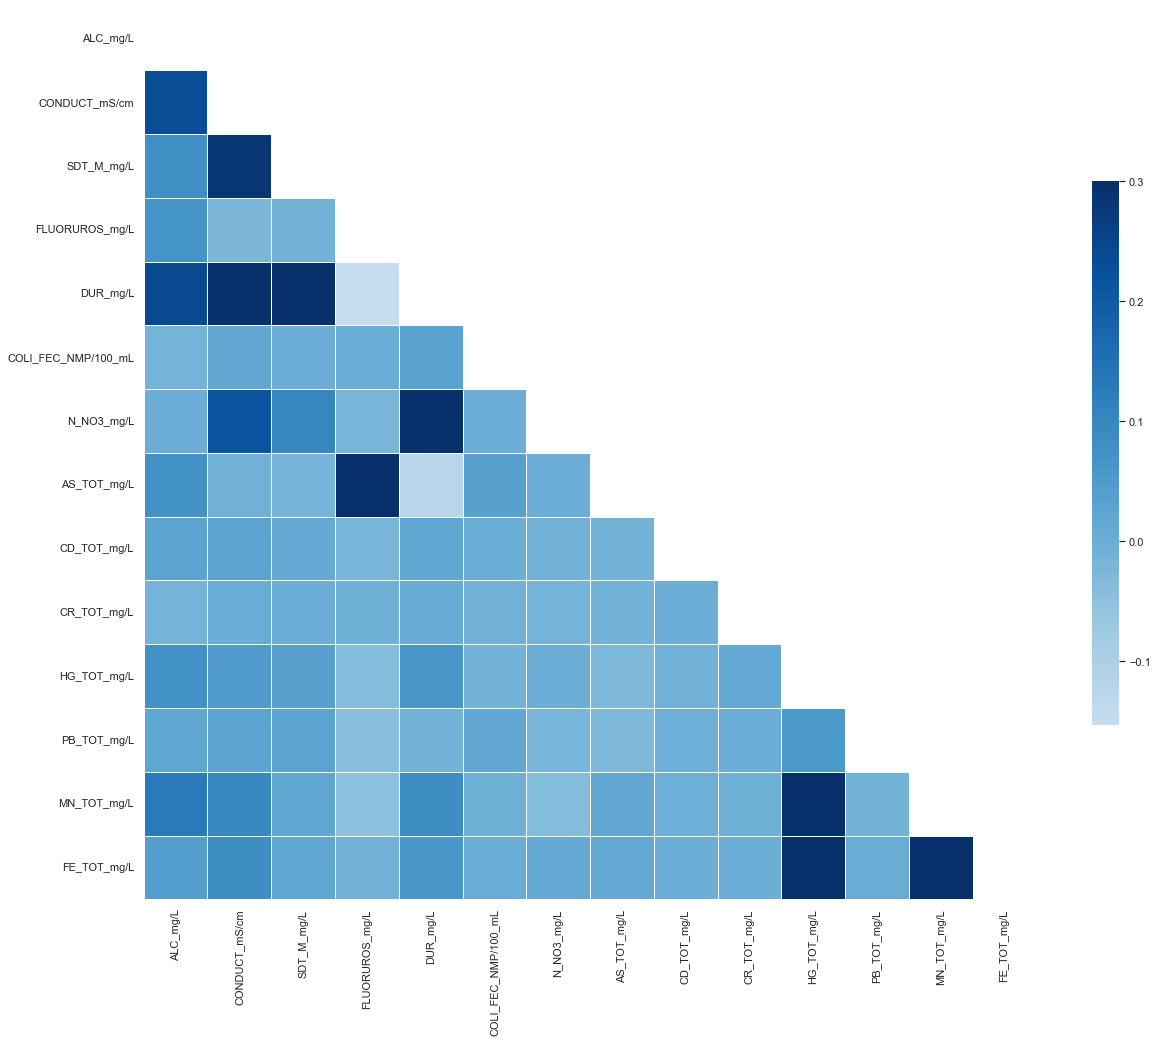

In [332]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  cmap='Blues',  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Kmeans

In [333]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [431]:
clusters=10
wcss=[]

for i in range(1,clusters):
  kmeans=KMeans(n_clusters=i, max_iter=3000)
  kmeans.fit(df_sub[['LATITUD', 'LONGITUD']])
  wcss.append(kmeans.inertia_)


In [ ]:
len(wcss)

9

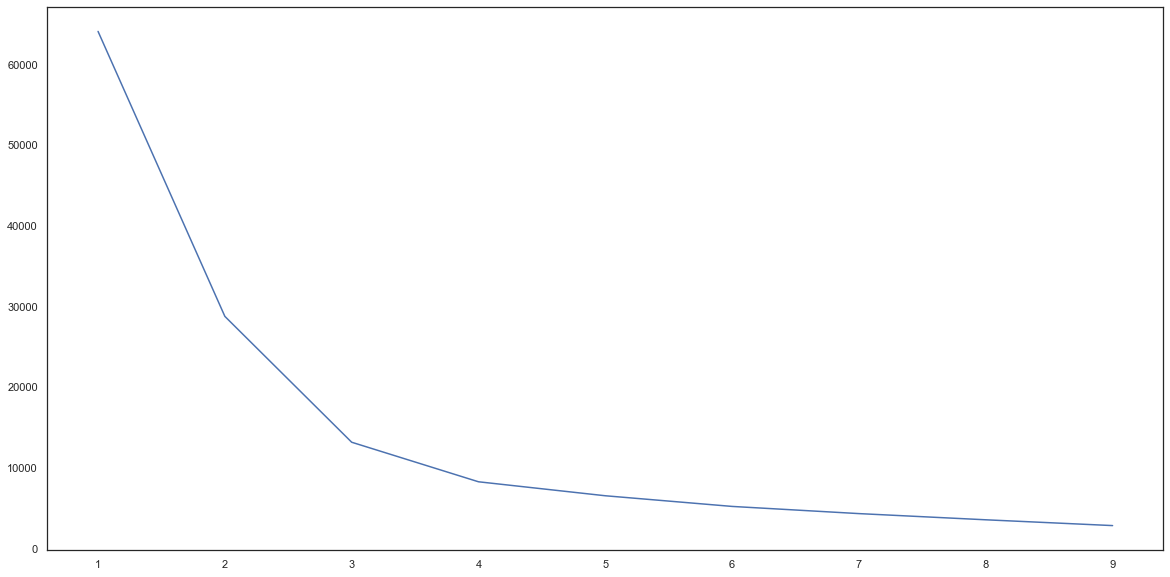

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.plot(range(1,clusters), wcss)
plt.show()

# Visualización

In [ ]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gdf=gpd.read_file("Estaciones_medicion_subterraneas.kml")

In [432]:
gdf.head()

,Name,Description,geometry
0,,,POINT Z (-102.02210 22.20887 0.00000)
1,,,POINT Z (-102.20075 21.99958 0.00000)
2,,,POINT Z (-102.28801 22.36685 0.00000)
3,,,POINT Z (-102.29449 22.18435 0.00000)
4,,,POINT Z (-110.24480 23.45138 0.00000)


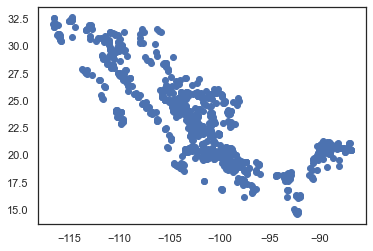

In [ ]:
gdf.plot()
plt.show()

In [433]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


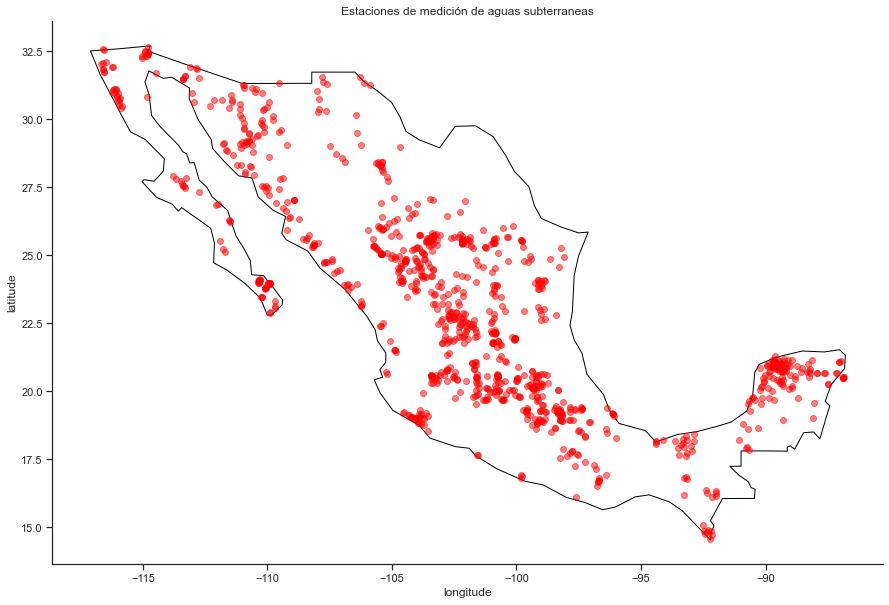

In [436]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(20,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Estaciones de medición de aguas subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()